# $\color{red}{\text{Quaternion Matrix}}$
> ### $
(a + bi + cj + dk) =: (a,\vec{v}), \quad
(e + fi + gj + hk) =: (e, \vec{w})
\\
(a,\vec{v})(e,\vec{w})
= (ae - (bf + cg + dh),  a(f+g+h) + e(b+c+d) + (ch-dg)_{jkj} + (df-bh)_{kik} + (bg-cf)_{iji})
\\
\therefore 
\Big(ae - \big(\vec{v} \cdot \vec{w}\big), \;
a\vec{w} + b\vec{v} + \big(\vec{v} \times \vec{w}\big) \Big)
\\
(a,b,c,d)(e,f,g,h) = \left( \begin{array}{l|l}
ae - bf - cg - dh & scalar\\
be + af - dg + ch & i\\
ce + df + ag - bh & j\\
de - cf + bg + ah & k
\end{array}\right)
\because ijk = -1,\quad i^2, j^2 , k^2 = -1,\quad ij = k ,jk = i,ki= j
$

In [95]:
# Quaternion Matrix
import IPython as Ipy
Ipy.display.YouTubeVideo('https://www.youtube.com/watch?v=3Ki14CsP_9k&list=PLpzmRsG7u_gr0FO12cBWj-15_e0yqQQ1U&index=2',width=800,height=640)

In [25]:
import sympy as sm
a,b,c,d,e,f,g,h = sm.symbols('a:h')

# quaternion muliply matrix
# a + bi + cj + dk = (a,b,c,d)
# a = scalar b = coeffient of i 
Q = sm.Matrix([
    [a,-b,-c,-d],
    [b, a,-d, c],
    [c, d, a,-b],
    [d,-c, b, a]])
q = sm.Matrix([e,f,g,h,])

# list(i for i in zip(q1,[1,2,3,4]))
# dict(i for i in zip(q1,[1,2,3,4]))

# a = scalar
I = sm.Matrix([1,0,0,0])
s = sm.Matrix([
    [ 1, 0, 0, 0],
    [ 0, 1, 0, 0],
    [ 0, 0, 1, 0],
    [ 0, 0, 0, 1],
])
# i = b vector
i = sm.Matrix([
    [ 0,-1, 0, 0],
    [ 1, 0, 0, 0],
    [ 0, 0, 0,-1],
    [ 0, 0, 1, 0],
])
# j = c
j = sm.Matrix([
    [ 0, 0,-1, 0],
    [ 0, 0, 0, 1],
    [ 1, 0, 0, 0],
    [ 0,-1, 0, 0],
])
# k = d
k = sm.Matrix([
    [ 0, 0, 0,-1],
    [ 0, 0,-1, 0],
    [ 0, 1, 0, 0],
    [ 1, 0, 0, 0],
])

q1 = (1*s+2*i+ 3*j+4*k)
q1

Matrix([
[1, -2, -3, -4],
[2,  1, -4,  3],
[3,  4,  1, -2],
[4, -3,  2,  1]])

In [21]:
(1*s+2*i+3*j+4*k)*(1*s+2*i+3*j+4*k)

Matrix([
[-28,  -4,  -6,  -8],
[  4, -28,  -8,   6],
[  6,   8, -28,  -4],
[  8,  -6,   4, -28]])

In [22]:
(1*s+2*i+ 3*j+4*k)*sm.Matrix([1,2,3,4])

Matrix([
[-28],
[  4],
[  6],
[  8]])

In [30]:
# conjugate
q1_ =1*s - 2*i - 3*j - 4*k
q1*q1_

Matrix([
[30,  0,  0,  0],
[ 0, 30,  0,  0],
[ 0,  0, 30,  0],
[ 0,  0,  0, 30]])

# $\color{red}{\text{Quaternion Multiplication}}$
> ### $
(qs_{1}, \vec{qv_{1}})(qs_{2},\vec{qv_{2}})
\\ \therefore \Big( qs_{1} qs_{2} -  \big(\vec{qv_{1}}  \cdot \vec{qv_{2}}\big),
\; qs_1 \vec{qv_{2}} + qs_2 \vec{qv_{1}} + \big(\vec{qv_{1}}\times\vec{qv_{2}}\big) \Big)
\\
$

> ### $
(0, \vec{qv_{1}})(0,\vec{qv_{2}})
\\ \therefore \Big(-\vec{qv_{1}}  \cdot \vec{qv_{2}},
\; \vec{qv_{1}}\times\vec{qv_{2}} \Big)
\\
$

> ### $
(0, \vec{qv_{2}})(0,\vec{qv_{1}})
\\ \therefore \Big(-\vec{qv_{1}}  \cdot \vec{qv_{2}},
\; \vec{qv_{2}}\times\vec{qv_{1}} \Big) 
\iff \Big(-\vec{qv_{1}}  \cdot \vec{qv_{2}},
\; - \vec{qv_{1}}\times\vec{qv_{2}} \Big) 
\\
$

> ### $
q_1 = (0, \vec{qv_{1}}) \quad q_2 = (0,\vec{qv_{2}})
\\ 
\begin{array}{c|l}
\\ &q_1 q_2 = \Big(-\vec{qv_{1}}  \cdot \vec{qv_{2}},
\; \vec{qv_{1}}\times\vec{qv_{2}} \Big) 
\\
\pm & q_2 q_1 = \Big(-\vec{qv_{1}}  \cdot \vec{qv_{2}},
\; - \vec{qv_{1}}\times\vec{qv_{2}} \Big) \\
& \hline \\ 
& q_1 q_2 + q_2 q_1 = \Big(-2\big(\vec{qv_1} \cdot \vec{qv_2},\; 0\big) \Big)
= -2\Big( \vec{q_1} \cdot \vec{q_2}\Big)\\
& q_1 q_2 - q_2 q_1 = \Big(0,\; 2\big(\vec{qv_1} \times \vec{qv_2}\big) \Big)
= 2\Big( \vec{qv_1} \times \vec{qv_2}\Big)
\end{array}
\\
\because \vec{qv_1} \times \vec{qv_2} = \frac{1}{2}\Big(q_1 q_2 - q_2 q_1 \Big)
= \frac{1}{2}\Big[q_1,q_2\Big]
$
## 교환자 ($\color{magenta}{commutator}$)
> ### $
\therefore \Big[q_1, q_2 \Big] = 2\big( \vec{qv_1} \times \vec{qv_2} \big)
\quad s.t \;q_1=(0,\vec{qv_1}),q_2=(0,\vec{qv_2})
\\ \therefore \vec{qv_1} \times \vec{qv_2} = \frac{1}{2}\Big[q_1, q_2 \Big]
\quad s.t \; \Big[A,B\Big] = AB - BA
$

In [112]:
# commutator
Ipy.display.IFrame('https://ko.wikipedia.org/wiki/%EA%B5%90%ED%99%98%EC%9E%90_(%ED%99%98%EB%A1%A0)#%EC%A0%95%EC%9D%98',width=800,height=600)

In [113]:
Ipy.display.YouTubeVideo('https://www.youtube.com/watch?v=UaK2q22mMEg&list=PLpzmRsG7u_gr0FO12cBWj-15_e0yqQQ1U&index=4',width=800,height=600)

# $\color{red}{\text{Rotation}}$ of special angle
> ### $
q_0 = (0, q^v_0)
\\ \theta = \text{Rotation angle}
\\ q_r = (0, q^v_r)
\\ q_a = (0, q^v_a) \quad \text{rotation axis}
\\ q_n = (0, q^v_n)
\\ q_{\perp} 
= (0, {\large \frac{q^v_r \cdot q^v_0 q^v_0}{q^v_0 \cdot q^v_0}}) 
= (0, {\large \frac{cos(\theta)\;||q^v_r||\; ||q^v_0|| \; q^v_0}{||q^v_0||^2}}) 
= (0,\; cos(\theta)q^v_0)\; \because ||q^v_0|| = ||q^v_r||
\\ q^v_{\circlearrowright} = (0,{\large \frac{q^v_r \cdot (q_n \times q_0)(q_n \times q_0)}{(q_n \times q_0)\cdot (q_n \times q_0)}}) = \cos(90-\theta)(q^v_{n} \times q^v_0) = \sin(\theta)(q^v_{n} \times q^v_0) \; 
\because ||(q^v_n \times q^v_0)|| = ||q^v_0||,\; ||q^v_n|| = 1
$

> ### $
\color{red}{q^v_r = q^v_{\perp} + q^v_{\circlearrowright}}
\\ \quad = \color{magenta}{cos(\theta)q^v_0 + sin(\theta)(q^v_n \times q^v_0)}
\\ \quad \because q^v_n q^v_0 = (0,\hat{q}^v_{a})(0,q^v_0) 
= (-(q^v_n \cdot q^v_0), (q^v_n \times q^v_0))\; 
\because q^v_n \perp q^v_0 \implies q^v_n \cdot q^v_0 = 0 \;
\therefore (0, q^v_n \times q^v_0) = q^v_n \times q^v_0
\\ \therefore cos(\theta)\; q^v_0 + sin(\theta)\; q^v_n q^v_0 = \big(cos(\theta) + sin(\theta)\; q^v_n\big) q^v_0
\\ \quad \because q^v_0 = (0, \hat{q}^v_a) \to (q^v_n)^2 = (0,\hat{q^v_a})(0,\hat{q^v_a}) = (-(\hat{q^v_a}\cdot \hat{q^v_a}), q^v_a \times q^v_a) 
= (-1,0) = -1 = i
\\ \therefore cos(\theta) + sin(\theta)\; q^v_n ) q^v_0 = \exp^{\theta q^v_n}q^v_0 = \color{magenta}{{\large \exp^{\theta \hat{q}_{axis}}q^v_0}}
$

In [76]:
# Rotate q_1 = (1, -1, 0) by \pi/3  radian about the axix q_{axix} = (1,1,1)
# qr = cos(\theta)q1 + sin(\theta)(\hat{qn} x q1)
#    = cos()qv1 + sin()qn*q1 \because (0,qvn)(0,qv1) = (-qvn \dot qv1, qvn x qv1) /cz qvn \perp qv1 \thf (0,qvn x qv1) = qvn x qv1
#    = cos()qv1 + sin()((qvn*qv1)
#    = ( cos() + sin()qvn )qv1
#    = \cz qvn^2 = -1 qvn*qvn = (0,\hat{qvn})(0,\hat{qvn}) = (-(qvn \cdot qvn), qvn x qvn) = (-1, 0) = -1
import sympy as sm
q1 = sm.Matrix([0,1,-1,0])
qa = sm.Matrix([0,1,1,1])
theta = sm.pi/3
l = 0
for i in qa:
    l += sm.sqrt(i)

qn = (1/sm.sqrt(l))*qa
sm.cos(theta)*q1
nc1 = qn[1:,0].cross(q1[1:,0])

sm.cos(theta)*q1[1:,:] + sm.sin(theta)*nc1

Matrix([
[ 1],
[ 0],
[-1]])

---
# Rotation in general $\big(\color{red}{\text{Rodrigues Rotation}}\big)$
> ### $
q_0 = (0,q^v_0)\\
\theta = \text{rotation angle by radian} \\
q_{r} = (0,q^v_{r}) \\
q_{axis} = (0,q^v_{axis})\\
q_{n} = (0,\hat{q}^v_{axis})\\
q_{\perp} = (0,q^v_{\perp}), \quad q'_{\perp} = (0,q'^v_{\perp}) \\
q_{\ulcorner} = (0,q^v_{\ulcorner}), \quad  q'_{\ulcorner} = (0,q'^v_{\ulcorner}) \\
q_{\parallel} = (0,q^v_{\parallel})$

> ### $
q_r = q^v_{\parallel} + q'^{v}_{\ulcorner}
\left \{ \begin {array}{}
q'^{v}_{\ulcorner} = {\large \exp^{\theta \hat{q}^v_{axis}}} q^v_{\ulcorner} = {\large \exp^{\theta q^v_n}q^v_{\perp}}\\
q'^{v}_{\perp} = cos\theta\;\big( q^v_{\perp} \big) + sin\theta \;\big(q^v_{\parallel} \times q^v_{\perp}\big)
= cos\theta\;(q^v_0 - q^v_{\parallel}) + sin\theta\;q^v_n \times (q^v_0 - q^v_{\parallel}) = cos\theta \, (q^v_{0} - q^v_{\parallel}) + sin\theta\; q^v_n \times q^v_0 \\
\quad =  cos\theta\; q^v_{0} - cos\theta \, q^v_{\parallel} + sin \theta q^v_n q^v_{0}\\
q^v_{\ulcorner} = \big( q^v_0 - q^v_{\parallel}\big) = q^v_{\perp} = \big(q^v_0 - q^v_{\parallel}\big)
\\ q^v_{\parallel} = {\large q^v_0 \cdot \frac{q^v_{n} q^v_n}{q^v_n \cdot q^v_n}} = q^v_0 \cdot q^v_n q^v_n
\end{array}\right .
$

> ### $
\therefore q^v_r = q^v_{\parallel} + cos\theta\; q^v_{0} - cos\theta\; q^v_{\parallel} + sin\theta\; q^v_n q^v_{0}
\\ \quad = (1 - cos\theta)q^v_{\parallel} +cos\theta\; q^v_0 + sin\theta\; q^v_n q^v_0
\\ \quad = (1 - cos\theta)\big(q^v_0 \cdot q^v_n q^v_n \big) +cos\theta\; q^v_0 + sin\theta\; q^v_n q^v_0
$

> # $
q^v_{\parallel} = \frac{q^v_0 \cdot q^v_{a} q^v_{a}}{q^v_{a}\cdot q^v_{a}}
= q^v_
$ 

> # $
q^v_{\lceil} = q^v - q^v_{\parallel}
$ 

> # $
q^v_{r\lceil} = \cos(\theta)q^v_{\lceil} + \sin(\theta)(q^v_{n}\times q^v_{\lceil})
$ 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
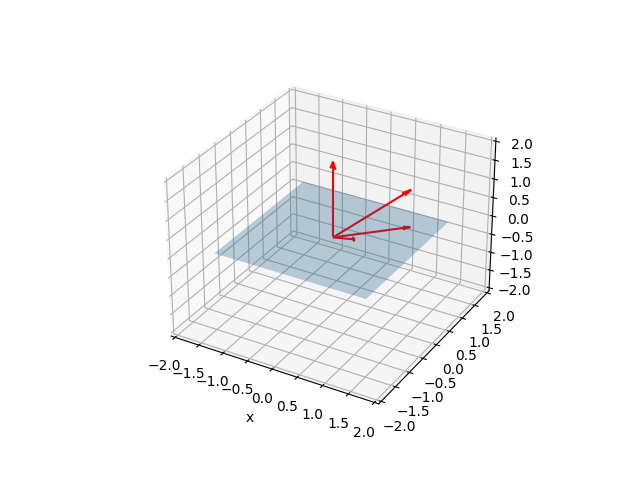

In [27]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import sympy as sm
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xi = np.linspace(-1.5,1.5,100)
xi,yi = np.meshgrid(xi,xi)
zi = np.zeros_like(xi)
ax.plot_surface(xi,yi,zi,alpha=0.3)
ax.set_xlim3d(-2,2)
ax.set_ylim3d(-2,2)
ax.set_zlim3d(-2,2)
ax.set_xlabel('x')
ax.quiver([0],[0],[0],[0],[0],[2],color='r',arrow_length_ratio=0.1)
ax.quiver([0],[0],[0],[1],[-1],[1],color='r',arrow_length_ratio=0.1)
ax.quiver([0],[0],[0],[1],[1],[0],color='r',arrow_length_ratio=0.1)
ax.quiver([0],[0],[0],[1],[1],[1],color='r',arrow_length_ratio=0.1)
